In [14]:
from imports import *
print('cuda' if torch.cuda.is_available() else 'cpu')

cuda


PSNR: 18.589069843292236 


Noisy             |        Clean


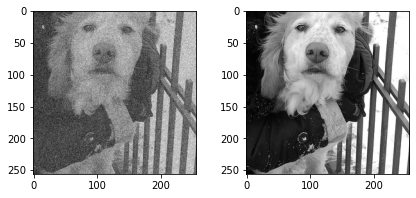

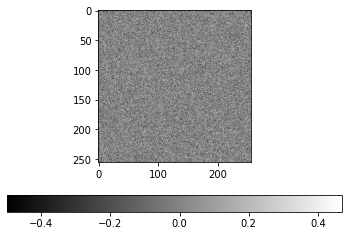

In [3]:
%matplotlib inline

sigma = 30
test_set = FlickrSet(mode='test', sigma=sigma)

# sample clean test image
test_img = test_set[1]

# print("Norm difference:", torch.norm(test_img[0] - test_img[1]).item())
print("PSNR:", 10*torch.log10(len(test_img[0].reshape(-1)) / torch.norm(test_img[0]-test_img[1])**2).item(), '\n\n')
print("Noisy             |        Clean")
show_multiple([test_img[0], test_img[1]])

fig, ax = plt.subplots()
im = ax.imshow(test_img[2], cmap='gray')
fig.colorbar(im, orientation='horizontal')
plt.show()

In [4]:
network_type = 'DnCNN'
denoiser = Denoiser(net=eval(network_type)(17), 
                    experiment_name='exp1_flickr30k_' + network_type, 
                    data=True,
                    sigma=sigma,
                    batch_size=10)

<IPython.core.display.Javascript object>


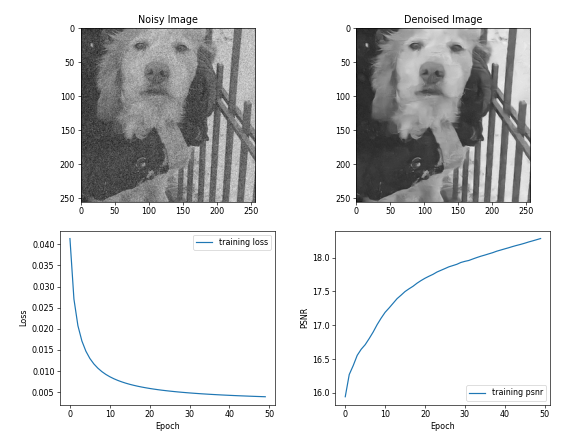

Start/Continue training from epoch 50
Finish training for 50 epochs


In [7]:
%matplotlib notebook

#train network 

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(7,6))

denoiser.run(num_epochs=50, fig=fig, axes=axes, noisy_img=test_img[0])

In [6]:
# evaluate performance on test set

denoiser.evaluate()

{'loss': 0.002285735111217946, 'psnr': tensor(19.1873, device='cuda:0')}